# Geometric Operations using OpenCV

In the first part of the lab, you will apply geometric transformations to an image. This allows you to perform different operations like reshape translation i.e. to shift, reshape and rotate the image. In the second part of the lab, you will learn how to apply some basic array and matrix operations to the image.

Geometric Operations<br>
Scaling<br>
Translation<br>
Rotation<br>
Mathematical Operations<br>
Array Operations<br>
Matix Operations n

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

First, let's define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.

In [2]:
def plot_image(image_1, image_2, title_1 = "Original", title_2 = "New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1, cmap="gray")
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2, cmap='gray')
    plt.title(title_2)
    plt.show()

# Geometric Transformations
Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.

<h2>Scaling</h2>
We can resize an image using the function resize() from cv2 module for this purpose. You can specify the scaling factor or the size of the image:

Consider the following image with the corresponding intensity values:

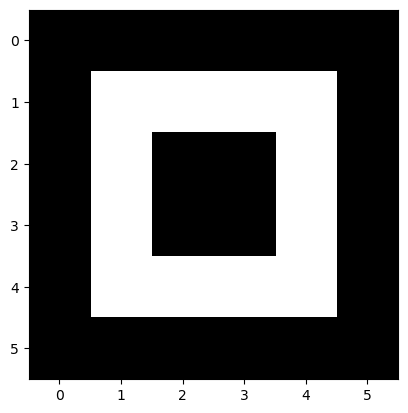

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [3]:
toy_image = np.zeros((6,6))
toy_image[1:5, 1:5] = 255
toy_image[2:4,2:4] = 0
plt.imshow(toy_image, cmap = 'gray')
plt.show()
toy_image

We can rescale along a specific axis:

fx: scale factor along the horizontal axis<br>
fy: scale factor along the vertical axis<br>
The parameter interpolation estimates pixel values based on neighboring pixels. INTER_NEAREST uses the nearest pixel and INTER_CUBIC uses several pixels near the pixel value we would like to estimate.

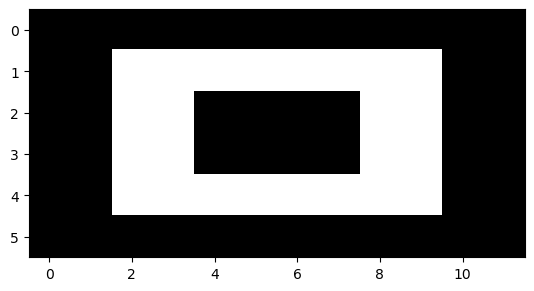

In [4]:
new_toy = cv2.resize(toy_image, None, fx=2, fy=1, interpolation = cv2.INTER_NEAREST)
plt.imshow(new_toy, cmap='gray')
plt.show()

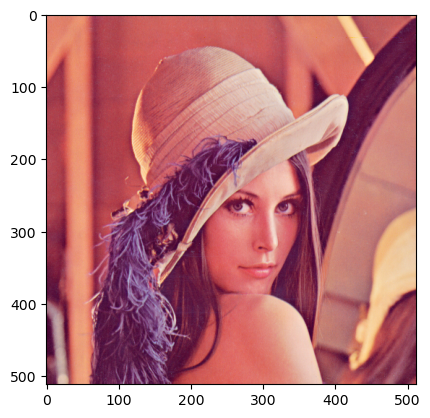

In [7]:
image = cv2.imread("lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

We can scale the horizontal axis by two and leave the vertical axis as is:

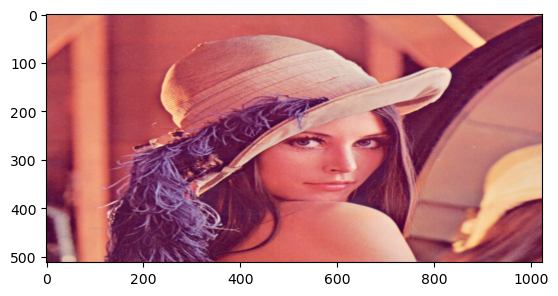

old image shape:  (512, 512, 3) new image shape :  (512, 1024, 3)


In [8]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape: ", image.shape, "new image shape : ", new_image.shape)

In the same manner, we can scale the vertical axis by two:

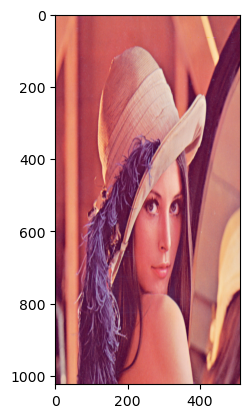

old image shape:  (512, 512, 3) new image shape:  (1024, 512, 3)


In [9]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape: ", image.shape, "new image shape: ", new_image.shape)

We can scale the horizontal axis and vertical axis by two.

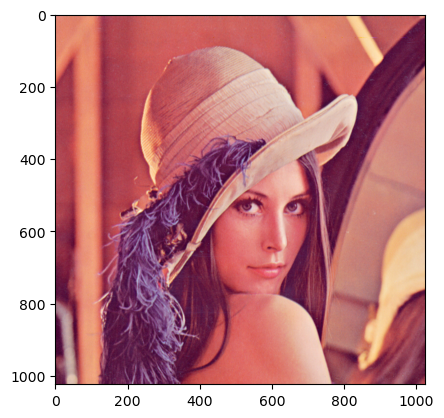

old image shape:  (512, 512, 3) new image shape:  (1024, 1024, 3)


In [10]:
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape: ", image.shape, "new image shape: ", new_image.shape)

We can also shrink the image by setting the scaling factor to a real number between 0 and 1:

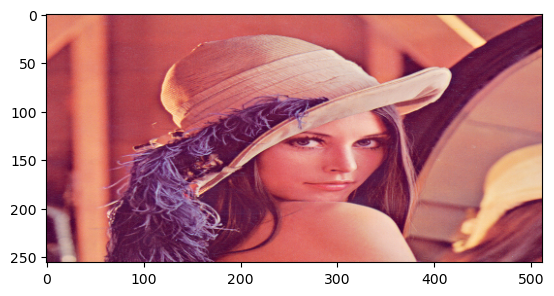

old image shape:  (512, 512, 3) new image shape:  (256, 512, 3)


In [11]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape: ", image.shape, "new image shape: ", new_image.shape)

We can also specify the number of rows and columns:

In [12]:
rows = 100
columns = 200

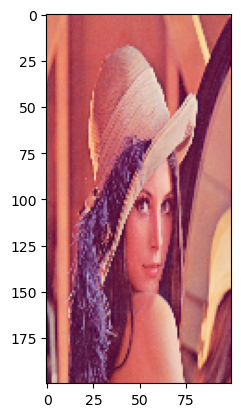

old image shape:  (512, 512, 3) new image shape:  (200, 100, 3)


In [13]:
new_image = cv2.resize(image, (rows, columns), interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape: ", image.shape, "new image shape: ", new_image.shape)

# Translation
Translation is when you shift the location of the image. tx is the number of pixels you shift the location in the horizontal direction and ty is the number of pixels you shift in the vertical direction. You can create the transformation matrix  𝑀
  to shift the image.

In this example, we shift the image 100 pixels horizontally:

In [14]:
tx = 100
ty = 0
M = np.float32([[1,0,tx],[0,1,ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [15]:
#The shape of the image is given by
rows, cols, _ = image.shape

We use the function <b>warpAffine</b> from the cv2 module. The first input parater is an image array, the second input parameter is the transformation matrix M, and the final input paramter is the length and width of the output image  <b>(𝑐𝑜𝑙𝑠,𝑟𝑜𝑤𝑠)</b>
 :

In [16]:
new_image = cv2.warpAffine(image, M, (cols,rows))

We can plot the image; the portions of the image that do not have any intensities are set to zero:

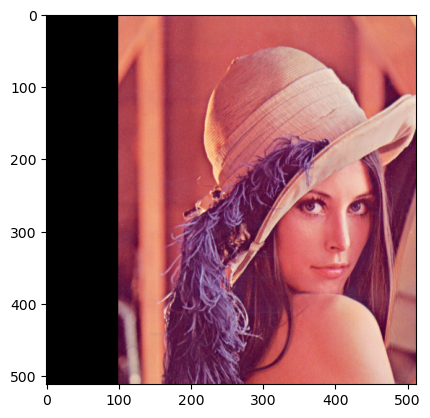

In [17]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can see some of the original image has been cut off. We can fix this by changing the output image size: (cols + tx,rows + ty):

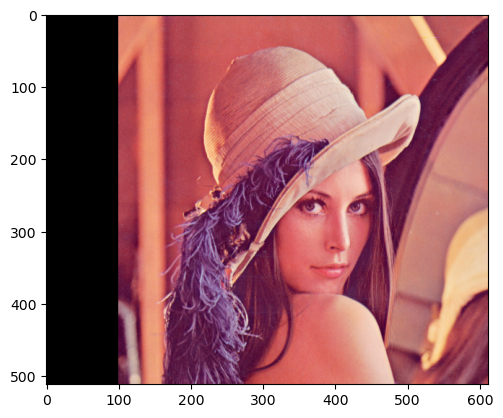

In [18]:
new_image = cv2.warpAffine(image, M, (cols+tx, rows+ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

Shift image horizontally

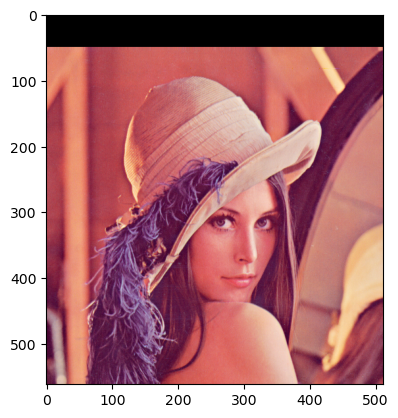

In [19]:
tx = 0
ty = 50
M = np.float32([[1,0,tx],[0,1,ty]])
new_image = cv2.warpAffine(image, M, (cols+tx, rows+ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

# Rotation
We can rotate an image by angle θ which is achieved by the Rotation Matrix getRotationMatrix2D.

center: Center of the rotation in the source image. We will only use the center of the image.<br>

angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).<br>

scale: Isotropic scale factor, in this course the value will be one.<br>

We can rotate our toy image by 45 degrees:

In [20]:
theta = 45.0
M = cv2.getRotationMatrix2D(center = (3,3), angle = theta, scale =1)
new_toy_image = cv2.warpAffine(toy_image, M, (6,6))

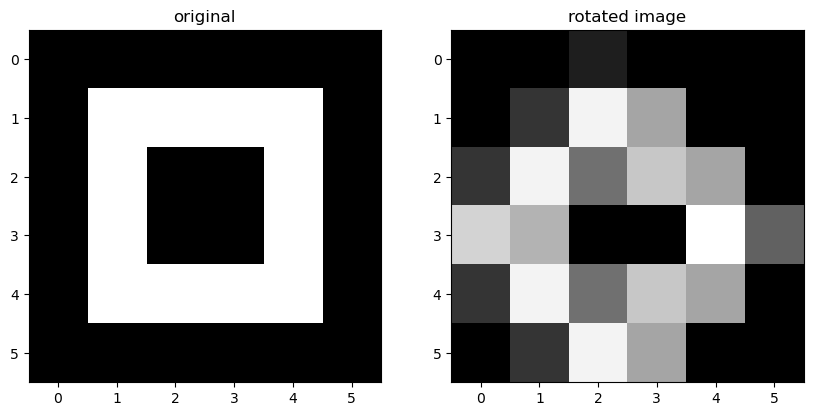

In [21]:
plot_image(toy_image, new_toy_image, title_1="original", title_2="rotated image")

Looking at intensity values, we see that many values have been interpolated:

In [22]:
new_toy_image

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

We can perform the same operation on color images:

In [25]:
cols, rows, _ = image.shape

In [26]:
M = cv2.getRotationMatrix2D(center = (cols // 2 -1, rows // 2 -1), angle = theta, scale =1)
new_image = cv2.warpAffine(image, M, (cols, rows))

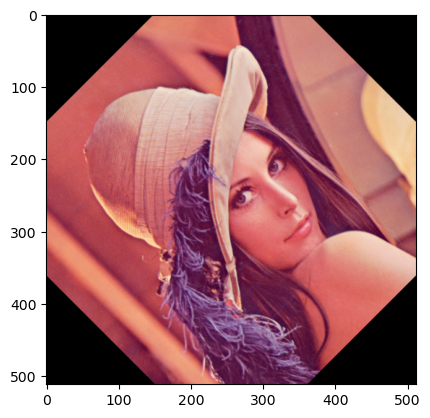

In [27]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

# Mathematical Operations¶
<h2>Array Operations</h2>
We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value.

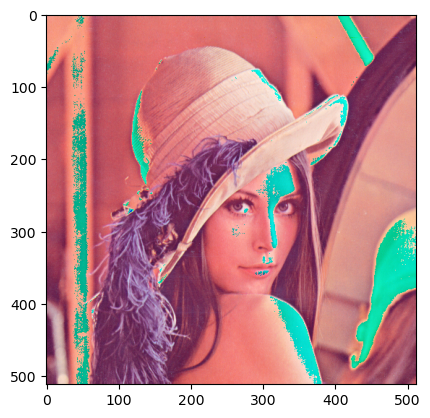

In [28]:
new_image = image + 20
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can also multiply every pixel's intensity value by a constant value.

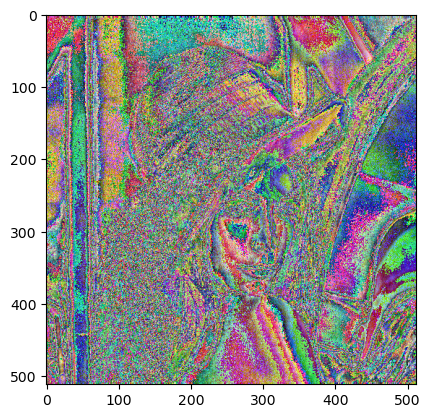

In [29]:
new_image = image*10
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
We can also multiply every pixel's intensity value by a constant value.